# Part 1: Data Loading and Initial Exploration (15 pts)

Instruction:  
Please also make sure to structure your notebooks as if you were conducting this as a clean and nicely presented data analysis report. Do not include our prompts/problem statements in the final report notebooks.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')

## 1.1 Exploratory Data Analysis

In [2]:
sou = pd.read_csv("data/SOTU.csv")
sou["Year"] = sou["Year"].astype(int)

sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020,\nThe President. Thank you very much. Thank yo...,6169


### 1.1.1 Number of Speeches per President

In [3]:
speeches_per_pres = sou["President"].value_counts()

pres_order = sou["President"].drop_duplicates()
speeches_per_pres = speeches_per_pres.reindex(pres_order)

speeches_per_pres

President
Joseph R. Biden           4
Donald J. Trump           4
Barack Obama              8
George W. Bush            8
William J. Clinton        8
George Bush               4
Ronald Reagan             8
Jimmy Carter              7
Gerald R. Ford            3
Richard M. Nixon          6
Lyndon B. Johnson         6
John F. Kennedy           3
Dwight D. Eisenhower     10
Harry S Truman            8
Franklin D. Roosevelt    11
Herbert Hoover            4
Calvin Coolidge           6
Warren G. Harding         2
Woodrow Wilson            8
William Howard Taft       4
Theodore Roosevelt        8
William McKinley          4
Grover Cleveland          8
Benjamin Harrison         4
Chester A. Arthur         4
Rutherford B. Hayes       4
Ulysses S. Grant          8
Andrew Johnson            4
Abraham Lincoln           4
James Buchanan            4
Franklin Pierce           4
Millard Fillmore          3
Zachary Taylor            1
James K. Polk             4
John Tyler                4
Martin Van

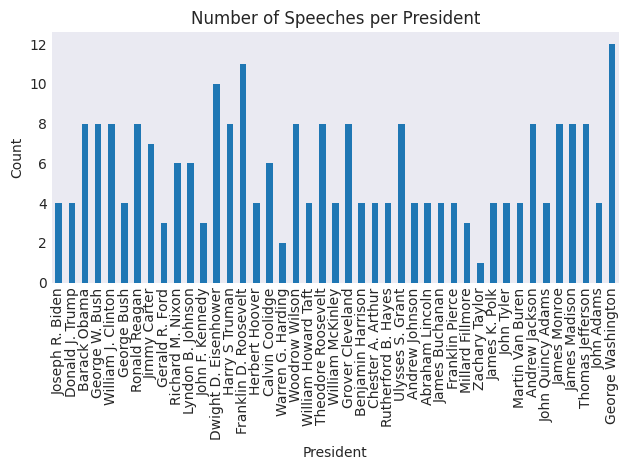

In [4]:
ax = speeches_per_pres.plot(kind="bar")

ax.set_title("Number of Speeches per President")
ax.set_ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()

### 1.1.2 Number of Speeches per Year

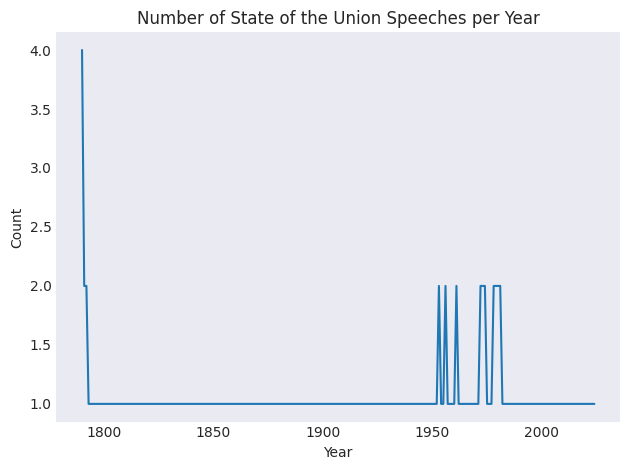

In [5]:
speeches_per_year = sou["Year"].value_counts().sort_index()

ax = speeches_per_year.plot()
ax.set_title("Number of State of the Union Speeches per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.tight_layout()

### 1.1.3 Word Count Distribution

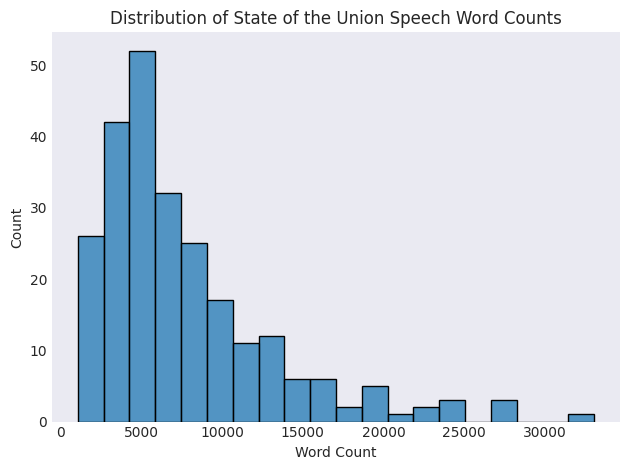

In [6]:
sns.histplot(data=sou, x="Word Count", bins=20)

plt.title("Distribution of State of the Union Speech Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.tight_layout()

### 1.1.4 Word Count Distribution over Year

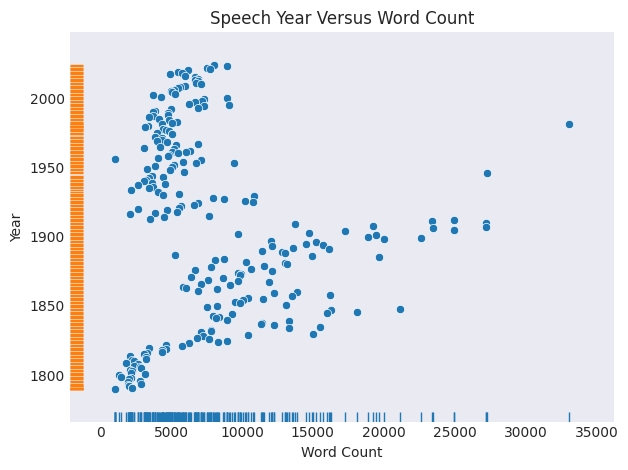

In [7]:
sns.scatterplot(data=sou, x="Word Count", y="Year")

sns.rugplot(data=sou, x="Word Count")
sns.rugplot(data=sou, y="Year")

plt.title("Speech Year Versus Word Count")
plt.xlabel("Word Count")
plt.ylabel("Year")
plt.tight_layout()

### 1.1.5 Word Count Distribution per President

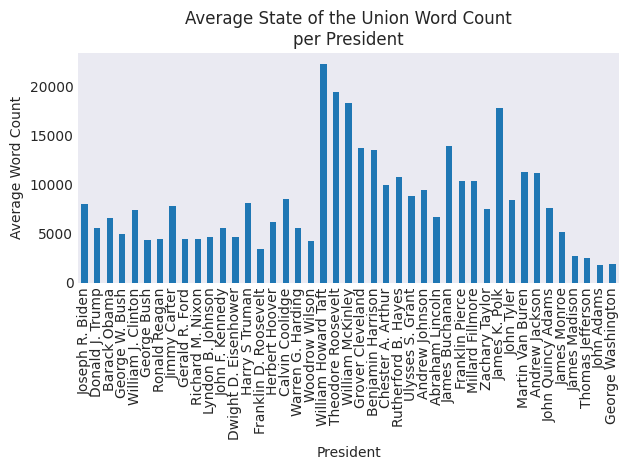

In [8]:
avg_words_pres = sou.groupby("President")["Word Count"].mean()

avg_words_pres = avg_words_pres.reindex(pres_order)

ax = avg_words_pres.plot(kind="bar")

ax.set_title("Average State of the Union Word Count\nper President")
ax.set_ylabel("Average Word Count")
plt.xticks(rotation=90)
plt.tight_layout()